**Project for pbl**

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_table('https://raw.githubusercontent.com/arib168/data/main/spam.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
x = df['message'].values
y = df['label'].values


In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

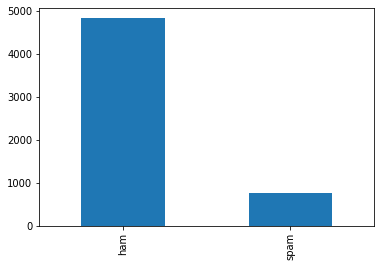

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.show

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')

In [ ]:
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
print(x_train_vect)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train_vect, y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_vect)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9813352476669059

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(x_train_vect, y_train)

MultinomialNB()

In [ ]:
model.predict(x_test_vect)

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [ ]:
y_pred_2 = model_1.predict(x_test)
y_pred_2

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_2)

0.9885139985642498

In [ ]:
model_1.predict(['Knock Knock Txt whose there to 80082 to enter r weekly draw 4 a £250 gift voucher 4 a store of yr choice. T&Cs www.tkls.com age16 to stoptxtstop£1.50/week'])

array(['spam'], dtype='<U4')

In [ ]:
model_1.predict(['Win Free tickets'])

array(['spam'], dtype='<U4')

In [ ]:
model_1.predict(['Win prizes'])

array(['spam'], dtype='<U4')

In [ ]:
model_1.predict(['win credit card money'])

array(['spam'], dtype='<U4')

In [ ]:
import joblib

In [ ]:
joblib.dump(model_1,'spam_prediction')

['spam_prediction']

In [ ]:
import joblib
model_1 = joblib.load('spam_prediction')

In [ ]:
model_1.predict(['pay credit card bills and win rewards'])

array(['spam'], dtype='<U4')

In [ ]:
# model_1.predict(['hello world'])

In [ ]:
pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 164 kB 34.4 MB/s 
     |████████████████████████████████| 181 kB 40.3 MB/s 
     |████████████████████████████████| 4.3 MB 35.1 MB/s 
     |████████████████████████████████| 76 kB 3.7 MB/s 
     |████████████████████████████████| 111 kB 55.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 130 kB 59.8 MB/s 
     |████████████████████████████████| 130 kB 65.9 MB/s 
     |████████████████████████████████| 428 kB 25.1 MB/s 
     |████████████████████████████████| 793 kB 35.6 MB/s 
     |████████████████████████████████| 381 kB 61.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1

In [ ]:
%%writefile spam_prediction_app.py
import streamlit as st
import joblib

model_1=joblib.load('spam_prediction')

st.title("EMAIL PREDICTION SYSTEM : SPAM OR HAM")
# user inputs
message = st.text_input("Enter your message that you want to predict")

# # predict the output
prediction = model_1.predict([message])

# #create a button , when press then output will predict
if st.button('PREDICT'):
  st.title(prediction[0])      #prints the output
print(prediction)


Writing spam_prediction_app.py


In [ ]:
!streamlit run spam_prediction_app.py & npx localtunnel --port 8501

2022-04-06 05:09:26.338 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.196.52.163:8501

npx: installed 22 in 6.616s
your url is: https://bright-puma-97.loca.lt
['ham']
['spam']
['spam']
  Stopping...
^C
